In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [330]:
jeju_data = pd.read_csv(r'C:\Users\Liv\Documents\Python Scripts\jeju_data.csv', encoding = 'CP949')
jeju_data

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,제주,서귀포시,건강보조식품 소매업,부산,사하구,50s,2,4,4,1900000,4
1,201901,제주,서귀포시,건강보조식품 소매업,인천,서구,50s,2,4,3,1300000,2
2,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,1,2,3,438000,3
3,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,2,2,4,552200,3
4,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,40s,1,2,3,908000,3
...,...,...,...,...,...,...,...,...,...,...,...,...
497498,202003,제주,제주시,휴양콘도 운영업,서울,노원구,50s,1,4,3,79500,3
497499,202003,제주,제주시,휴양콘도 운영업,제주,제주시,30s,1,2,4,1656000,5
497500,202003,제주,제주시,휴양콘도 운영업,제주,제주시,40s,1,3,3,304560,3
497501,202003,제주,제주시,휴양콘도 운영업,제주,제주시,50s,2,4,4,60000,4


In [306]:
jeju_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497503 entries, 0 to 497502
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      497503 non-null  int64 
 1   CARD_SIDO_NM  497503 non-null  object
 2   CARD_CCG_NM   497503 non-null  object
 3   STD_CLSS_NM   497503 non-null  object
 4   HOM_SIDO_NM   497503 non-null  object
 5   HOM_CCG_NM    494432 non-null  object
 6   AGE           497503 non-null  object
 7   SEX_CTGO_CD   497503 non-null  int64 
 8   FLC           497503 non-null  int64 
 9   CSTMR_CNT     497503 non-null  int64 
 10  AMT           497503 non-null  int64 
 11  CNT           497503 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 45.5+ MB


In [307]:
jeju_data.isnull().sum() # 거주지역(시도)에서 결측치 발견

REG_YYMM           0
CARD_SIDO_NM       0
CARD_CCG_NM        0
STD_CLSS_NM        0
HOM_SIDO_NM        0
HOM_CCG_NM      3071
AGE                0
SEX_CTGO_CD        0
FLC                0
CSTMR_CNT          0
AMT                0
CNT                0
dtype: int64

In [308]:
jeju_data.describe()

,REG_YYMM,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
count,497503.000000,497503.000000,497503.000000,497503.000000,4.975030e+05,497503.000000
mean,201920.565661,1.470890,2.711887,49.572770,2.700652e+06,90.790825
std,33.840883,0.499152,1.296198,501.528665,2.781698e+07,1174.123621
min,201901.000000,1.000000,1.000000,3.000000,1.000000e+02,1.000000
25%,201904.000000,1.000000,2.000000,3.000000,1.030000e+05,4.000000
50%,201908.000000,1.000000,3.000000,6.000000,2.610200e+05,8.000000
75%,201911.000000,2.000000,4.000000,14.000000,7.914000e+05,20.000000
max,202003.000000,2.000000,5.000000,32813.000000,2.349524e+09,84947.000000


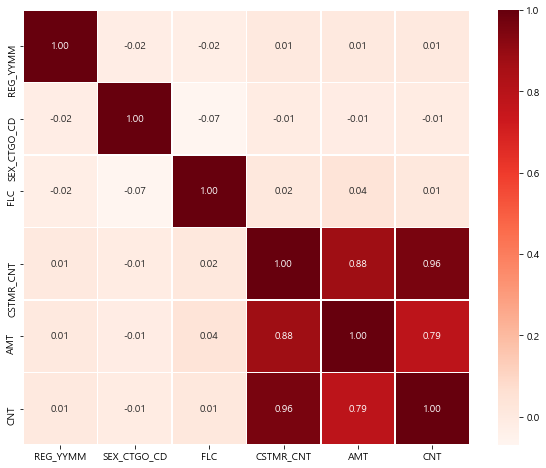

In [309]:
# 숫자형 변수들 간 상관관계 히트맵
plt.figure(figsize = (10,8))
sns.heatmap(data = jeju_data.corr(), annot = True, fmt = '.2f', linewidths=.5, cmap='Reds')
# 이용고객수와 이용건수의 상관관계 매우 높음 (0.96)
# 이용고객수와 이용금액의 상관관계 높음 (0.88)
# 이용건수와 이용금액의 상관관계도 높은 편 (0.79)

### 년월 (REG_YYMM) --- 전처리 불필요

In [310]:
jeju_data['REG_YYMM'].unique()

array([201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
       201909, 201910, 201911, 201912, 202001, 202002, 202003],
      dtype=int64)

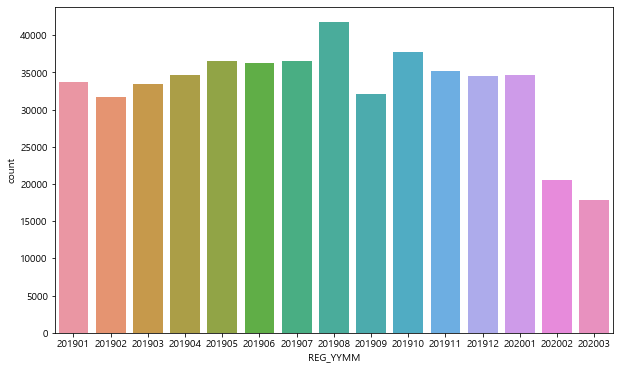

In [311]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x = 'REG_YYMM', data = jeju_data) # 시간순 정렬

In [123]:
jeju_data['REG_YYMM'].value_counts()

201908    41758
201910    37762
201907    36534
201905    36505
201906    36321
201911    35177
201904    34718
202001    34693
201912    34581
201901    33776
201903    33499
201909    32084
201902    31718
202002    20475
202003    17902
Name: REG_YYMM, dtype: int64

### 카드이용지역_시도 (CARD_SIDO_NM) --- 전처리 불필요

In [312]:
jeju_data['CARD_SIDO_NM'].value_counts()

제주    497503
Name: CARD_SIDO_NM, dtype: int64

### 카드이용지역_시군구 (CARD_CCG_NM) --- 전처리 불필요

In [313]:
jeju_data['CARD_CCG_NM'].value_counts()

제주시     325624
서귀포시    171879
Name: CARD_CCG_NM, dtype: int64

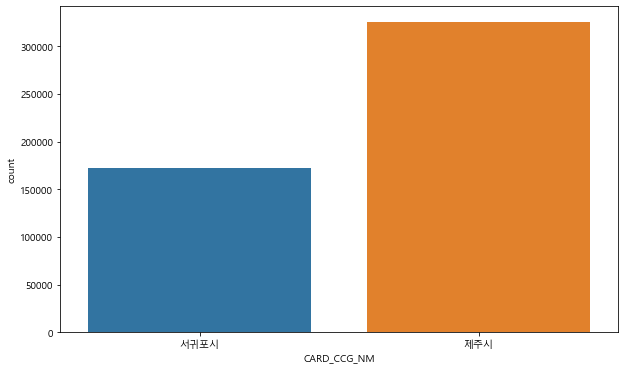

In [314]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x = 'CARD_CCG_NM', data = jeju_data)

### 업종명 (STD_CLSS_NM)

In [190]:
jeju_data['STD_CLSS_NM'].value_counts()

한식 음식점업                  52483
체인화 편의점                  52180
면세점                      49117
서양식 음식점업                 25199
정기 항공 운송업                23288
수산물 소매업                  22970
기타 대형 종합 소매업             21917
차량용 주유소 운영업              21897
비알콜 음료점업                 19750
과실 및 채소 소매업              19599
관광 민예품 및 선물용품 소매업        19407
전시 및 행사 대행업              18846
피자 햄버거 샌드위치 및 유사 음식점업    18679
슈퍼마켓                     17840
일식 음식점업                  12797
자동차 임대업                  12790
내항 여객 운송업                12113
빵 및 과자류 소매업              11905
기타음식료품위주종합소매업            10488
여관업                      10066
휴양콘도 운영업                  7515
호텔업                       6592
골프장 운영업                   3975
중식 음식점업                   3409
화장품 및 방향제 소매업             3264
그외 기타 종합 소매업              2922
욕탕업                       2706
육류 소매업                    2445
차량용 가스 충전업                2375
스포츠 및 레크레이션 용품 임대업        2134
일반유흥 주점업                  2028
여행사업                      1826
기타 외국식 음

In [200]:
jeju_data['STD_CLSS_NM'].describe() # 업종 40개

count      497503
unique         40
top       한식 음식점업
freq        52483
Name: STD_CLSS_NM, dtype: object

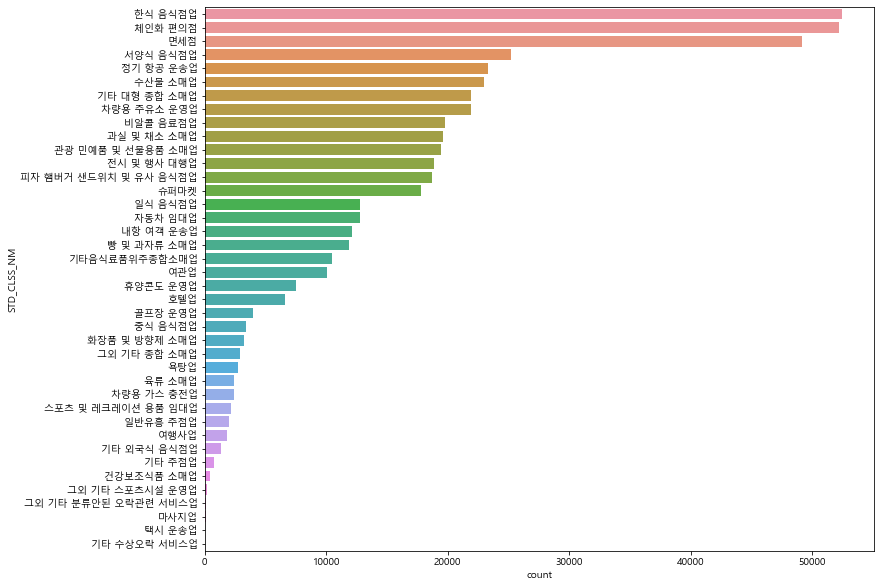

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.countplot(y = 'STD_CLSS_NM', data = jeju_data, order = jeju_data['STD_CLSS_NM'].value_counts().index) # 내림차순 정렬

In [315]:
jeju_data['STD_CLSS_NM'].unique()

array(['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업',
       '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 대형 종합 소매업', '기타 외국식 음식점업',
       '기타 주점업', '기타음식료품위주종합소매업', '내항 여객 운송업', '면세점', '비알콜 음료점업',
       '빵 및 과자류 소매업', '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업',
       '여관업', '여행사업', '욕탕업', '육류 소매업', '일반유흥 주점업', '일식 음식점업',
       '전시 및 행사 대행업', '중식 음식점업', '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점',
       '피자 햄버거 샌드위치 및 유사 음식점업', '한식 음식점업', '호텔업', '화장품 및 방향제 소매업',
       '휴양콘도 운영업', '마사지업', '자동차 임대업', '정기 항공 운송업', '기타 수상오락 서비스업',
       '그외 기타 분류안된 오락관련 서비스업', '택시 운송업'], dtype=object)

In [331]:
jeju_data2 = jeju_data.copy()
jeju_data2['STD_CLSS_NM_cat'] = jeju_data2['STD_CLSS_NM'] # 40가지 업종을 6가지 산업으로 범주화, 추가적으로 STD_CLSS_NM_cat 칼럼 생성

In [332]:
jeju_data2['STD_CLSS_NM_cat'] = jeju_data2['STD_CLSS_NM_cat'].replace(['체인화 편의점','면세점','수산물 소매업','기타 대형 종합 소매업','차량용 주유소 운영업','과실 및 채소 소매업','관광 민예품 및 선물용품 소매업','슈퍼마켓','빵 및 과자류 소매업','기타음식료품위주종합소매업','화장품 및 방향제 소매업','그외 기타 종합 소매업','육류 소매업','차량용 가스 충전업','건강보조식품 소매업'], '소매업')
jeju_data2['STD_CLSS_NM_cat'] = jeju_data2['STD_CLSS_NM_cat'].replace(['여관업','휴양콘도 운영업','호텔업'], '숙박업')
jeju_data2['STD_CLSS_NM_cat'] = jeju_data2['STD_CLSS_NM_cat'].replace(['한식 음식점업','서양식 음식점업','비알콜 음료점업','피자 햄버거 샌드위치 및 유사 음식점업','일식 음식점업','중식 음식점업','일반유흥 주점업','기타 외국식 음식점업','기타 주점업'], '음식점업')
jeju_data2['STD_CLSS_NM_cat'] = jeju_data2['STD_CLSS_NM_cat'].replace(['정기 항공 운송업','내항 여객 운송업','택시 운송업'], '운수업')
jeju_data2['STD_CLSS_NM_cat'] = jeju_data2['STD_CLSS_NM_cat'].replace(['전시 및 행사 대행업','골프장 운영업','스포츠 및 레크레이션 용품 임대업','그외 기타 스포츠시설 운영업','그외 기타 분류안된 오락관련 서비스업',''], '예술스포츠여가')
jeju_data2['STD_CLSS_NM_cat'] = jeju_data2['STD_CLSS_NM_cat'].replace(['자동차 임대업','욕탕업','여행사업','마사지업'], '기타')
jeju_data2.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,STD_CLSS_NM_cat
0,201901,제주,서귀포시,건강보조식품 소매업,부산,사하구,50s,2,4,4,1900000,4,소매업
1,201901,제주,서귀포시,건강보조식품 소매업,인천,서구,50s,2,4,3,1300000,2,소매업
2,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,1,2,3,438000,3,소매업
3,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,2,2,4,552200,3,소매업
4,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,40s,1,2,3,908000,3,소매업


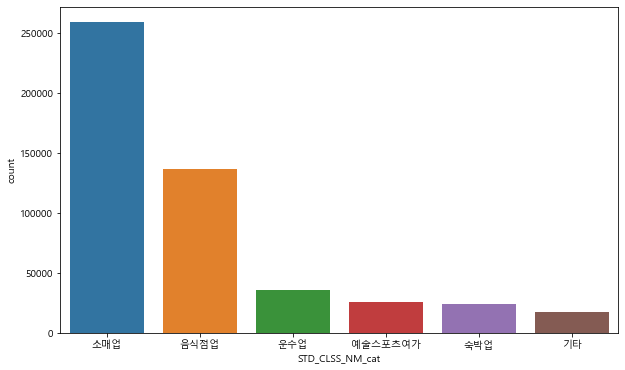

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x = 'STD_CLSS_NM_cat', data = jeju_data2, order = jeju_data2['STD_CLSS_NM_cat'].value_counts().index) # 내림차순 정렬

### 거주지역(시도) (HOM_SIDO_NM)

In [160]:
jeju_data['HOM_SIDO_NM'].value_counts()

경기    123898
서울    109454
부산     36721
제주     35957
인천     27044
경남     25946
대구     25166
광주     17382
경북     16048
충남     13218
전북     12750
전남     11462
대전     10996
울산     10807
충북     10243
강원      7340
세종      3071
Name: HOM_SIDO_NM, dtype: int64

In [162]:
jeju_data['HOM_SIDO_NM'].describe() # 17개 시도

count     497503
unique        17
top           경기
freq      123898
Name: HOM_SIDO_NM, dtype: object

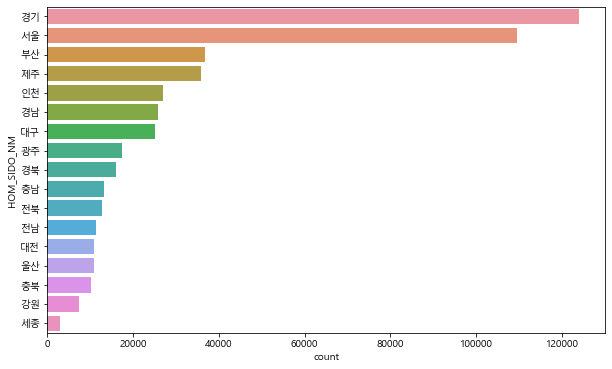

In [161]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(y = 'HOM_SIDO_NM', data = jeju_data, order = jeju_data['HOM_SIDO_NM'].value_counts().index) # 내림차순 정렬

In [333]:
jeju_data2['HOM_SIDO_NM_cat'] = jeju_data2['HOM_SIDO_NM'] # 17개 시도를 6개 권역으로 범주화, 추가적으로 HOM_SIDO_NM_cat 칼럼 생성

In [334]:
jeju_data2['HOM_SIDO_NM_cat'] = jeju_data2['HOM_SIDO_NM_cat'].replace(['서울', '경기', '인천'], '수도권')
jeju_data2['HOM_SIDO_NM_cat'] = jeju_data2['HOM_SIDO_NM_cat'].replace(['부산', '경남', '경북', '대구', '울산'], '경상권')
jeju_data2['HOM_SIDO_NM_cat'] = jeju_data2['HOM_SIDO_NM_cat'].replace(['대전', '충남', '충북', '세종'], '충청권')
jeju_data2['HOM_SIDO_NM_cat'] = jeju_data2['HOM_SIDO_NM_cat'].replace(['광주', '전남', '전북'], '전라권')
jeju_data2['HOM_SIDO_NM_cat'] = jeju_data2['HOM_SIDO_NM_cat'].replace('강원', '강원권')
jeju_data2['HOM_SIDO_NM_cat'] = jeju_data2['HOM_SIDO_NM_cat'].replace('제주', '제주권')
jeju_data2.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,STD_CLSS_NM_cat,HOM_SIDO_NM_cat
0,201901,제주,서귀포시,건강보조식품 소매업,부산,사하구,50s,2,4,4,1900000,4,소매업,경상권
1,201901,제주,서귀포시,건강보조식품 소매업,인천,서구,50s,2,4,3,1300000,2,소매업,수도권
2,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,1,2,3,438000,3,소매업,제주권
3,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,2,2,4,552200,3,소매업,제주권
4,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,40s,1,2,3,908000,3,소매업,제주권


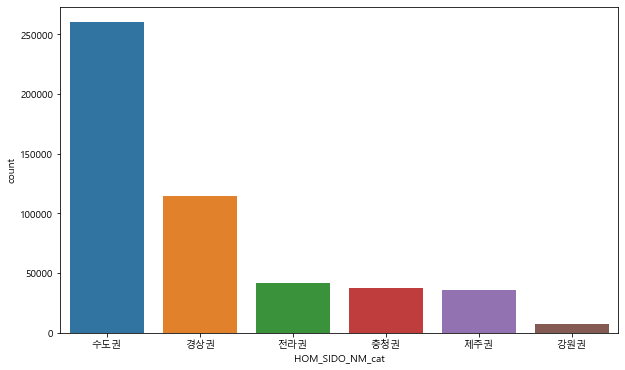

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x = 'HOM_SIDO_NM_cat', data = jeju_data2, order = jeju_data2['HOM_SIDO_NM_cat'].value_counts().index) # 내림차순 정렬

In [11]:
jeju_data2['HOM_SIDO_NM_cat'].value_counts()

수도권    260396
경상권    114688
전라권     41594
충청권     37528
제주권     35957
강원권      7340
Name: HOM_SIDO_NM_cat, dtype: int64

### 거주지역(시군구) (HOM_CCG_NM) --- 결측치 有

In [163]:
jeju_data['HOM_CCG_NM'].value_counts()

제주시     19230
서귀포시    16727
서구      15226
남구      14408
북구      14254
        ...  
진안군        14
무주군        13
군위군        11
영양군         9
울릉군         2
Name: HOM_CCG_NM, Length: 226, dtype: int64

In [38]:
jeju_data['HOM_CCG_NM'].unique()

array(['사하구', '서구', '서귀포시', '제주시', '고양시 일산동구', '광주시', '구리시', '부천시',
       '성남시 분당구', '시흥시', '안양시 만안구', '용인시 기흥구', '용인시 수지구', '용인시 처인구',
       '화성시', '북구', '달서구', '수성구', '남구', '해운대구', '강남구', '강동구', '관악구',
       '구로구', '노원구', '마포구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '부평구', '연수구', '목포시', '강릉시', '원주시', '춘천시', '고양시 덕양구',
       '고양시 일산서구', '과천시', '광명시', '군포시', '김포시', '남양주시', '동두천시', '성남시 중원구',
       '수원시 권선구', '수원시 영통구', '수원시 장안구', '수원시 팔달구', '안산시 단원구', '안산시 상록구',
       '안성시', '안양시 동안구', '양주시', '오산시', '의왕시', '의정부시', '이천시', '파주시', '평택시',
       '포천시', '하남시', '거제시', '김해시', '양산시', '의령군', '진주시', '창원시 마산합포구',
       '창원시 마산회원구', '창원시 성산구', '창원시 의창구', '창원시 진해구', '통영시', '경산시', '경주시',
       '구미시', '안동시', '영천시', '포항시 북구', '광산구', '동구', '달성군', '대덕구', '유성구',
       '중구', '강서구', '금정구', '기장군', '동래구', '부산진구', '사상구', '연제구', '강북구',
       '광진구', '금천구', '도봉구', '동대문구', '동작구', '서대문구', '중랑구', nan, '울주군',
       '계양구', '남동구', '광양시', '순천시', '여수시', '영광군', '군산시', '완주군', '전주시 덕진구'

In [164]:
jeju_data['HOM_CCG_NM'].describe() # 226개 시군구

count     494432
unique       226
top          제주시
freq       19230
Name: HOM_CCG_NM, dtype: object

In [336]:
jeju_data['HOM_CCG_NM'].isnull().sum() # 결측치 개수 찾기

3071

In [337]:
jeju_data.loc[jeju_data.isnull().any(axis=1)] # 결측치가 있는 행만 출력 --> 세종시의 경우 시군구가 모두 missing value

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
593,201901,제주,서귀포시,과실 및 채소 소매업,세종,NaN,20s,1,1,3,49500,4
594,201901,제주,서귀포시,과실 및 채소 소매업,세종,NaN,30s,1,2,3,113000,3
595,201901,제주,서귀포시,과실 및 채소 소매업,세종,NaN,30s,2,2,4,365500,8
821,201901,제주,서귀포시,관광 민예품 및 선물용품 소매업,세종,NaN,30s,1,2,6,193100,7
822,201901,제주,서귀포시,관광 민예품 및 선물용품 소매업,세종,NaN,40s,1,3,3,85000,4
...,...,...,...,...,...,...,...,...,...,...,...,...
497131,202003,제주,제주시,한식 음식점업,세종,NaN,40s,1,3,26,1052500,28
497132,202003,제주,제주시,한식 음식점업,세종,NaN,40s,2,3,3,158000,10
497133,202003,제주,제주시,한식 음식점업,세종,NaN,50s,1,4,36,1552000,44
497134,202003,제주,제주시,한식 음식점업,세종,NaN,50s,2,4,7,275000,8


In [338]:
sejong = jeju_data[jeju_data.HOM_SIDO_NM == '세종']
sejong['HOM_CCG_NM'].value_counts().index # 세종시의 시군구 값은 모두 결측치

Index([], dtype='object')

In [339]:
jeju_data.loc[(jeju_data['HOM_CCG_NM'].isnull())&(jeju_data['HOM_SIDO_NM']=='세종'),'HOM_CCG_NM'] = '세종' # 결측치들을 '세종'으로 대체

In [340]:
jeju_data['HOM_CCG_NM'].isnull().sum() # 결측치 처리됨

0

### 연령대 (AGE) --- 전처리 불필요

In [4]:
jeju_data['AGE'].value_counts()

30s    125254
40s    119569
20s    100407
50s     94772
60s     43686
70s      7503
10s      6312
Name: AGE, dtype: int64

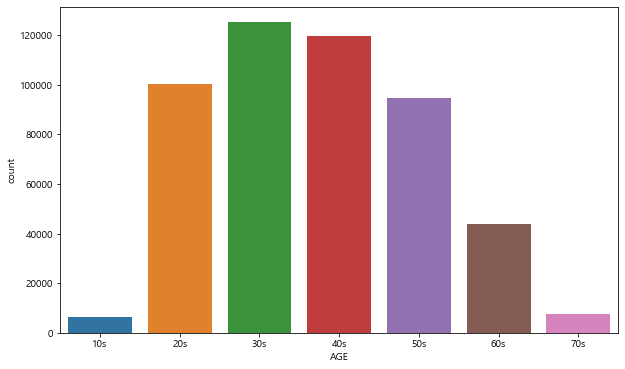

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x = 'AGE', data = jeju_data, order=["10s","20s","30s","40s","50s","60s","70s"]) # 나이순 정렬

### 성별 (SEX_CTGO_CD) --- 전처리 불필요

In [323]:
jeju_data['SEX_CTGO_CD'].value_counts() # 1: 남성   2: 여성

1    263234
2    234269
Name: SEX_CTGO_CD, dtype: int64

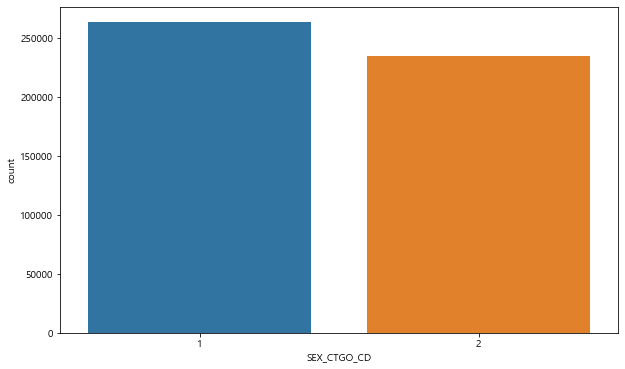

In [324]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x = 'SEX_CTGO_CD', data = jeju_data)

### 가구생애주기 (FLC) --- 전처리 불필요

In [169]:
jeju_data['FLC'].value_counts()

2    139955
4    106978
1    106369
3     93012
5     51189
Name: FLC, dtype: int64

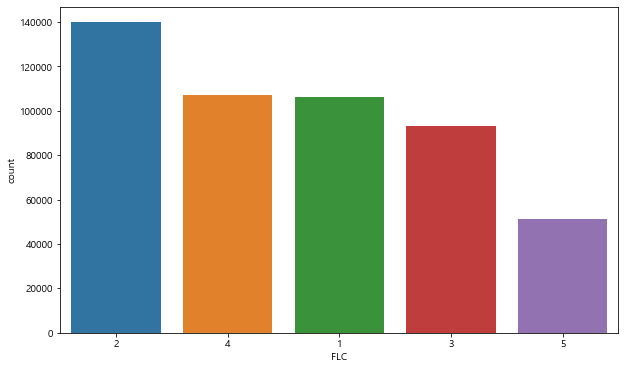

In [122]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x = 'FLC', data = jeju_data, order = jeju_data['FLC'].value_counts().index) # 내림차순 정렬
# 1: 1인 가구
# 2: 영유아자녀 가구
# 3: 중고생자녀 가구
# 4: 성인자녀 가구
# 5: 노년가구

### 이용고객수 (CSTMR_CNT) 

In [208]:
jeju_data['CSTMR_CNT'].value_counts()

3       137291
4        59270
6        35533
5        31589
7        26234
         ...  
6280         1
3979         1
1930         1
8073         1
3965         1
Name: CSTMR_CNT, Length: 3491, dtype: int64

In [4]:
jeju_data['CSTMR_CNT'].describe() # mean과 50%값에 큰 차이, 높은 std와 max

count    497503.000000
mean         49.572770
std         501.528665
min           3.000000
25%           3.000000
50%           6.000000
75%          14.000000
max       32813.000000
Name: CSTMR_CNT, dtype: float64

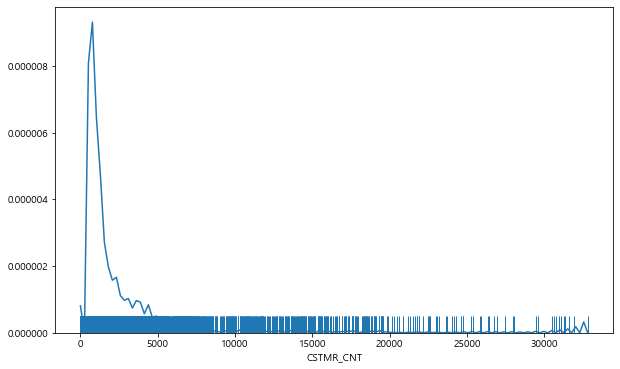

In [209]:
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(jeju_data['CSTMR_CNT'], rug = True, hist = False) # 데이터의 분포가 치우쳐 있음

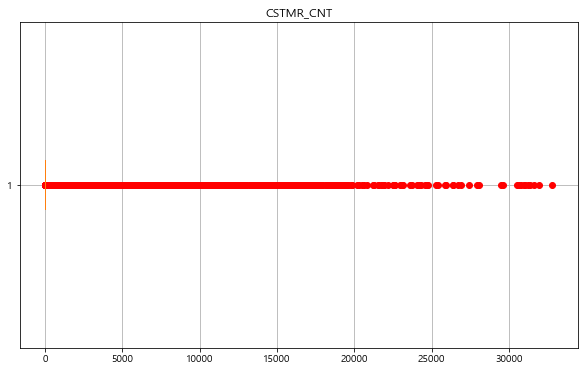

In [207]:
f, ax = plt.subplots(figsize = (10, 6)) 
plt.boxplot(jeju_data['CSTMR_CNT'], sym = "ro", vert = 0)
plt.title('CSTMR_CNT')
plt.grid()

In [341]:
jeju_data2['CSTMR_CNT_log'] = np.log1p(jeju_data2['CSTMR_CNT']) # log를 취한 CSTMR_CNT를 새로운 칼럼으로 생성
jeju_data2.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,STD_CLSS_NM_cat,HOM_SIDO_NM_cat,CSTMR_CNT_log
0,201901,제주,서귀포시,건강보조식품 소매업,부산,사하구,50s,2,4,4,1900000,4,소매업,경상권,1.609438
1,201901,제주,서귀포시,건강보조식품 소매업,인천,서구,50s,2,4,3,1300000,2,소매업,수도권,1.386294
2,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,1,2,3,438000,3,소매업,제주권,1.386294
3,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,2,2,4,552200,3,소매업,제주권,1.609438
4,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,40s,1,2,3,908000,3,소매업,제주권,1.386294


Skewness: 2.016
Kurtosis: 5.644


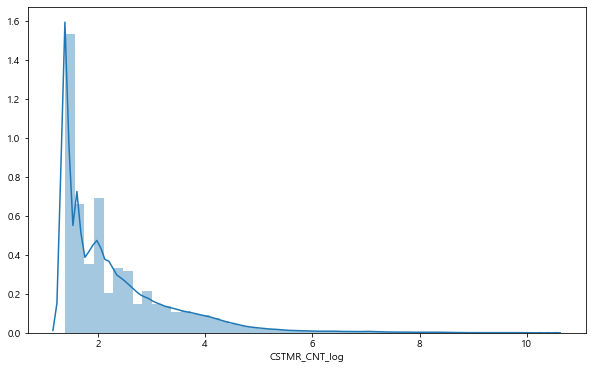

In [342]:
# log를 취해 정규성을 높인 데이터를 그래프로 나타냄
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(jeju_data2['CSTMR_CNT_log'], rug = False) 
print("Skewness: {:.3f}".format(jeju_data2['CSTMR_CNT_log'].skew())) 
print("Kurtosis: {:.3f}".format(jeju_data2['CSTMR_CNT_log'].kurt()))

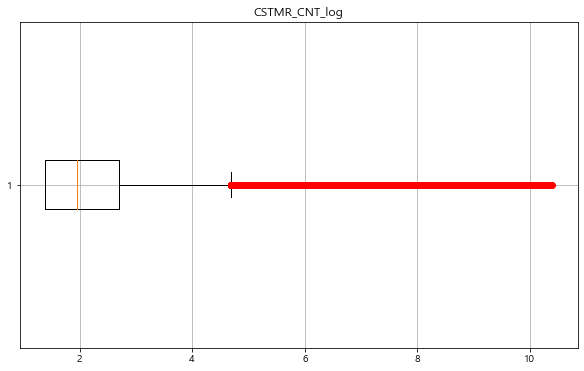

In [343]:
f, ax = plt.subplots(figsize = (10, 6)) 
plt.boxplot(jeju_data2['CSTMR_CNT_log'], sym = "ro", vert = 0)
plt.title('CSTMR_CNT_log')
plt.grid()

In [344]:
jeju_data2['CSTMR_CNT_log'].describe() # 분산이 1에 근접

count    497503.000000
mean          2.306394
std           1.113831
min           1.386294
25%           1.386294
50%           1.945910
75%           2.708050
max          10.398611
Name: CSTMR_CNT_log, dtype: float64

In [345]:
# 이상치 탐지 (IQR 이용)
Q1 = np.percentile(jeju_data2['CSTMR_CNT_log'], 25) 
Q3 = np.percentile(jeju_data2['CSTMR_CNT_log'], 75) 
IQR = Q3 - Q1 
outlier_step = 1.5 * IQR 
outlier_list_col = jeju_data2[(jeju_data2['CSTMR_CNT_log'] < Q1 - outlier_step) | (jeju_data2['CSTMR_CNT_log'] > Q3 + outlier_step)].index 

In [346]:
jeju_data2.loc[outlier_list_col] # 이상치가 발견된 행을 모두 출력 ---> 19288개

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,STD_CLSS_NM_cat,HOM_SIDO_NM_cat,CSTMR_CNT_log
92,201901,제주,서귀포시,골프장 운영업,제주,서귀포시,50s,1,4,367,53547290,587,예술스포츠여가,제주권,5.908083
93,201901,제주,서귀포시,골프장 운영업,제주,서귀포시,50s,2,4,126,17173660,191,예술스포츠여가,제주권,4.844187
94,201901,제주,서귀포시,골프장 운영업,제주,서귀포시,60s,1,5,206,31371050,347,예술스포츠여가,제주권,5.332719
101,201901,제주,서귀포시,골프장 운영업,제주,제주시,40s,1,3,198,25394310,233,예술스포츠여가,제주권,5.293305
106,201901,제주,서귀포시,골프장 운영업,제주,제주시,50s,1,4,437,52902490,547,예술스포츠여가,제주권,6.082219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497489,202003,제주,제주시,화장품 및 방향제 소매업,제주,제주시,50s,1,4,434,41574712,544,소매업,제주권,6.075346
497491,202003,제주,제주시,화장품 및 방향제 소매업,제주,제주시,50s,2,4,878,68878380,1090,소매업,제주권,6.778785
497492,202003,제주,제주시,화장품 및 방향제 소매업,제주,제주시,60s,1,5,211,13819030,245,소매업,제주권,5.356586
497493,202003,제주,제주시,화장품 및 방향제 소매업,제주,제주시,60s,2,5,497,67171495,567,소매업,제주권,6.210600


In [347]:
jeju_data2.drop(outlier_list_col , inplace=True) # 이상치가 있는 행 모두 제거

In [348]:
jeju_data2['CSTMR_CNT_log'].describe() # 이상치를 처리하여 데이터의 개수가 감소함

count    478215.000000
mean          2.160003
std           0.827068
min           1.386294
25%           1.386294
50%           1.945910
75%           2.639057
max           4.682131
Name: CSTMR_CNT_log, dtype: float64

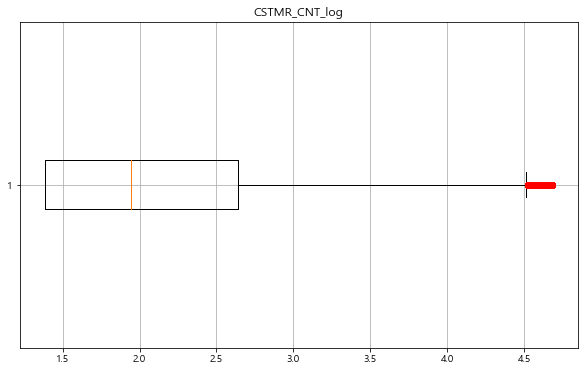

In [350]:
f, ax = plt.subplots(figsize = (10, 6)) 
plt.boxplot(jeju_data2['CSTMR_CNT_log'], sym = "ro", vert = 0)
plt.title('CSTMR_CNT_log')
plt.grid()

### 이용금액 (AMT) 

In [173]:
jeju_data['AMT'].value_counts()

80000        927
100000       888
60000        884
90000        862
70000        839
            ... 
927988014      1
1567020        1
302530         1
81770790       1
76965          1
Name: AMT, Length: 161235, dtype: int64

In [174]:
jeju_data['AMT'].describe() # mean과 50%값에 큰 차이, 높은 std와 max

count    4.975030e+05
mean     2.700652e+06
std      2.781698e+07
min      1.000000e+02
25%      1.030000e+05
50%      2.610200e+05
75%      7.914000e+05
max      2.349524e+09
Name: AMT, dtype: float64

C:\Users\Liv\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Liv\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


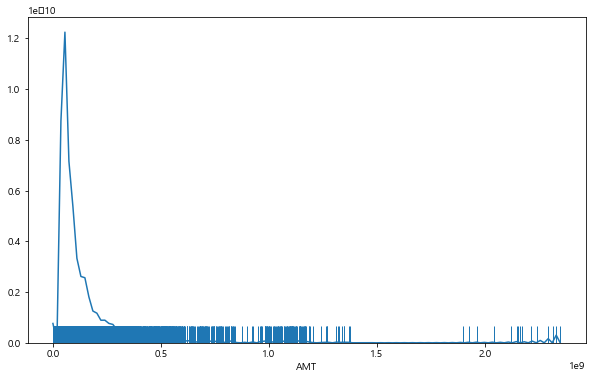

In [351]:
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(jeju_data['AMT'], rug = True, hist = False) # 데이터의 분포가 치우쳐 있음

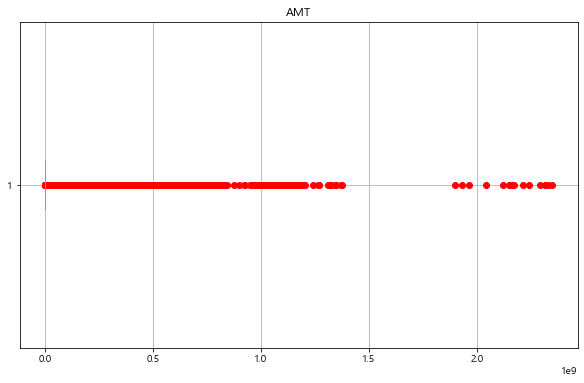

In [352]:
f, ax = plt.subplots(figsize = (10, 6)) 
plt.boxplot(jeju_data['AMT'], sym = "ro", vert = 0)
plt.title('AMT')
plt.grid()

In [353]:
jeju_data2['AMT_log'] = np.log1p(jeju_data2['AMT']) # log를 취한 AMT를 새로운 칼럼으로 생성
jeju_data2.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,STD_CLSS_NM_cat,HOM_SIDO_NM_cat,CSTMR_CNT_log,AMT_log
0,201901,제주,서귀포시,건강보조식품 소매업,부산,사하구,50s,2,4,4,1900000,4,소매업,경상권,1.609438,14.457365
1,201901,제주,서귀포시,건강보조식품 소매업,인천,서구,50s,2,4,3,1300000,2,소매업,수도권,1.386294,14.077876
2,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,1,2,3,438000,3,소매업,제주권,1.386294,12.989976
3,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,2,2,4,552200,3,소매업,제주권,1.609438,13.221667
4,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,40s,1,2,3,908000,3,소매업,제주권,1.386294,13.719001


Skewness: 0.258
Kurtosis: -0.294


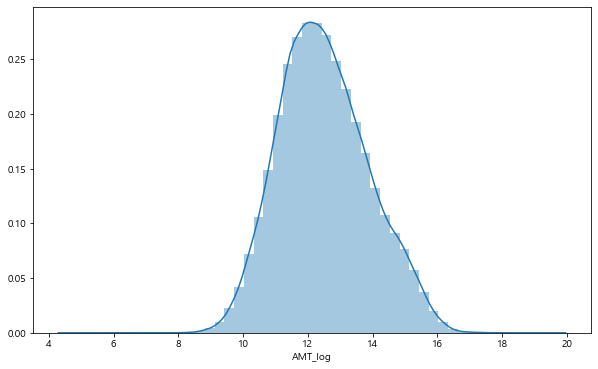

In [354]:
# log를 취해 정규성을 높인 데이터를 그래프로 나타냄
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(jeju_data2['AMT_log'], rug = False) 
print("Skewness: {:.3f}".format(jeju_data2['AMT_log'].skew())) 
print("Kurtosis: {:.3f}".format(jeju_data2['AMT_log'].kurt()))

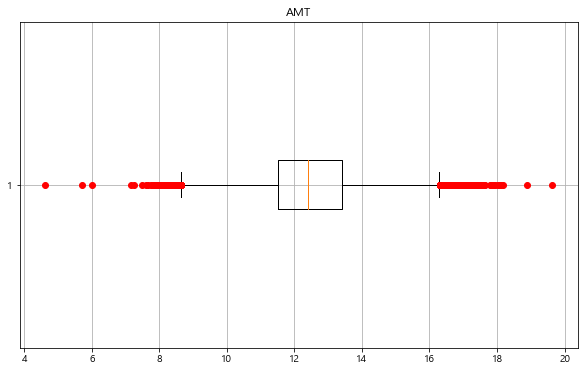

In [355]:
f, ax = plt.subplots(figsize = (10, 6)) 
plt.boxplot(jeju_data2['AMT_log'], sym = "ro", vert = 0)
plt.title('AMT')
plt.grid()

In [357]:
jeju_data2['AMT_log'].describe() # 분산이 1에 근접

count    478215.000000
mean         12.501382
std           1.382814
min           4.615121
25%          11.506414
50%          12.400821
75%          13.422686
max          19.638991
Name: AMT_log, dtype: float64

In [358]:
# 이상치 탐지 (IQR 이용)
Q1 = np.percentile(jeju_data2['AMT_log'], 25) 
Q3 = np.percentile(jeju_data2['AMT_log'], 75) 
IQR = Q3 - Q1 
outlier_step = 1.5 * IQR 
outlier_list_col = jeju_data2[(jeju_data2['AMT_log'] < Q1 - outlier_step) | (jeju_data2['AMT_log'] > Q3 + outlier_step)].index 

In [359]:
jeju_data2.loc[outlier_list_col] # 이상치가 발견된 행을 모두 출력 ---> 1020개

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,STD_CLSS_NM_cat,HOM_SIDO_NM_cat,CSTMR_CNT_log,AMT_log
88,201901,제주,서귀포시,골프장 운영업,제주,서귀포시,40s,1,3,94,13478190,136,예술스포츠여가,제주권,4.553877,16.416583
104,201901,제주,서귀포시,골프장 운영업,제주,제주시,40s,2,3,57,30004040,76,예술스포츠여가,제주권,4.060443,17.216843
688,201901,제주,서귀포시,과실 및 채소 소매업,제주,서귀포시,40s,2,3,86,12738297,171,소매업,제주권,4.465908,16.360124
1652,201901,제주,서귀포시,기타 주점업,제주,서귀포시,30s,1,2,70,28415000,105,음식점업,제주권,4.262680,17.162428
1655,201901,제주,서귀포시,기타 주점업,제주,서귀포시,40s,1,2,49,15266000,74,음식점업,제주권,3.912023,16.541139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497440,202003,제주,제주시,호텔업,제주,서귀포시,60s,1,5,4,17679800,6,숙박업,제주권,1.609438,16.687933
497443,202003,제주,제주시,호텔업,제주,제주시,20s,2,2,3,20350000,3,숙박업,제주권,1.386294,16.828592
497451,202003,제주,제주시,호텔업,제주,제주시,50s,1,4,103,23053481,153,숙박업,제주권,4.644391,16.953327
497452,202003,제주,제주시,호텔업,제주,제주시,50s,2,4,58,67385935,82,숙박업,제주권,4.077537,18.025947


In [360]:
jeju_data2.drop(outlier_list_col , inplace=True) # 이상치가 있는 행 모두 제거

In [362]:
jeju_data2['AMT_log'].describe() # 이상치를 처리하여 데이터의 개수가 감소함

count    477195.000000
mean         12.495279
std           1.370975
min           8.639588
25%          11.504903
50%          12.397565
75%          13.416213
max          16.296777
Name: AMT_log, dtype: float64

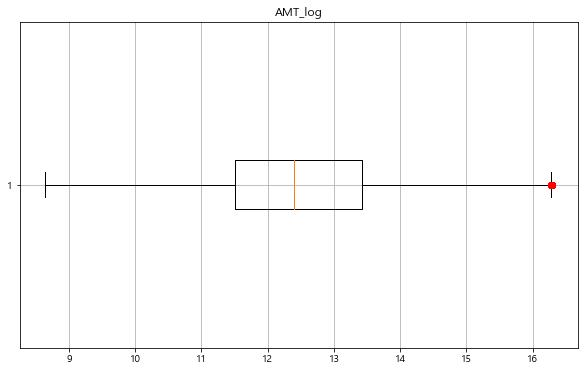

In [363]:
f, ax = plt.subplots(figsize = (10, 6)) 
plt.boxplot(jeju_data2['AMT_log'], sym = "ro", vert = 0)
plt.title('AMT_log')
plt.grid()

### 이용건수 (CNT) 

In [364]:
jeju_data['CNT'].value_counts()

3        79413
4        60337
5        40212
6        33111
7        27927
         ...  
32620        1
2241         1
9831         1
14535        1
3713         1
Name: CNT, Length: 4555, dtype: int64

In [365]:
jeju_data['CNT'].describe() # mean과 50%값에 큰 차이, 높은 std와 max

count    497503.000000
mean         90.790825
std        1174.123621
min           1.000000
25%           4.000000
50%           8.000000
75%          20.000000
max       84947.000000
Name: CNT, dtype: float64

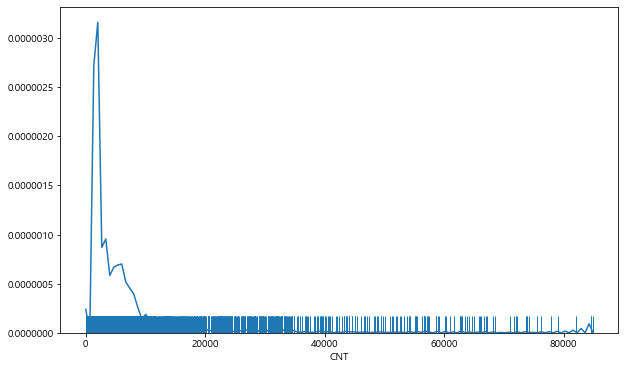

In [366]:
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(jeju_data['CNT'], rug = True, hist = False) # 데이터의 분포가 치우쳐 있음

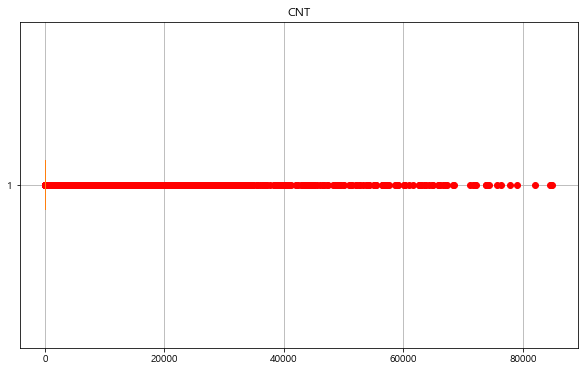

In [367]:
f, ax = plt.subplots(figsize = (10, 6)) 
plt.boxplot(jeju_data['CNT'], sym = "ro", vert = 0)
plt.title('CNT')
plt.grid()

In [369]:
jeju_data2['CNT_log'] = np.log1p(jeju_data2['CNT']) # log를 취한 CNT를 새로운 칼럼으로 생성
jeju_data2.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,STD_CLSS_NM_cat,HOM_SIDO_NM_cat,CSTMR_CNT_log,AMT_log,CNT_log
0,201901,제주,서귀포시,건강보조식품 소매업,부산,사하구,50s,2,4,4,1900000,4,소매업,경상권,1.609438,14.457365,1.609438
1,201901,제주,서귀포시,건강보조식품 소매업,인천,서구,50s,2,4,3,1300000,2,소매업,수도권,1.386294,14.077876,1.098612
2,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,1,2,3,438000,3,소매업,제주권,1.386294,12.989976,1.386294
3,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,30s,2,2,4,552200,3,소매업,제주권,1.609438,13.221667,1.386294
4,201901,제주,서귀포시,건강보조식품 소매업,제주,서귀포시,40s,1,2,3,908000,3,소매업,제주권,1.386294,13.719001,1.386294


Skewness: 0.989
Kurtosis: 0.217


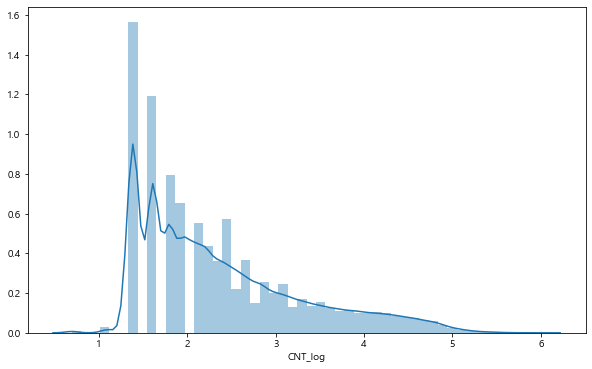

In [370]:
# log를 취해 정규성을 높인 데이터를 그래프로 나타냄
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(jeju_data2['CNT_log'], rug = False) 
print("Skewness: {:.3f}".format(jeju_data2['CNT_log'].skew())) 
print("Kurtosis: {:.3f}".format(jeju_data2['CNT_log'].kurt()))

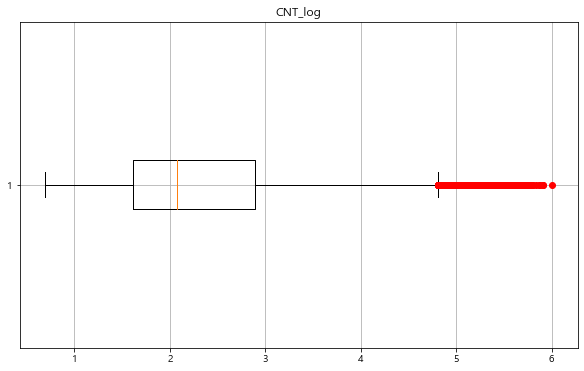

In [371]:
f, ax = plt.subplots(figsize = (10, 6)) 
plt.boxplot(jeju_data2['CNT_log'], sym = "ro", vert = 0)
plt.title('CNT_log')
plt.grid()

In [373]:
jeju_data2['CNT_log'].describe() # 분산이 1에 근접

count    477195.000000
mean          2.369987
std           0.919333
min           0.693147
25%           1.609438
50%           2.079442
75%           2.890372
max           6.006353
Name: CNT_log, dtype: float64

In [374]:
# 이상치 탐지 (IQR 이용)
Q1 = np.percentile(jeju_data2['CNT_log'], 25) 
Q3 = np.percentile(jeju_data2['CNT_log'], 75) 
IQR = Q3 - Q1 
outlier_step = 1.5 * IQR 
outlier_list_col = jeju_data2[(jeju_data2['CNT_log'] < Q1 - outlier_step) | (jeju_data2['CNT_log'] > Q3 + outlier_step)].index 

In [376]:
jeju_data2.loc[outlier_list_col] # 이상치가 발견된 행을 모두 출력 ---> 6200개

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,STD_CLSS_NM_cat,HOM_SIDO_NM_cat,CSTMR_CNT_log,AMT_log,CNT_log
96,201901,제주,서귀포시,골프장 운영업,제주,서귀포시,70s,1,5,52,9396700,153,예술스포츠여가,제주권,3.970292,16.055869,5.036953
685,201901,제주,서귀포시,과실 및 채소 소매업,제주,서귀포시,40s,1,3,81,7890800,152,소매업,제주권,4.406719,15.881208,5.030438
1543,201901,제주,서귀포시,기타 대형 종합 소매업,제주,서귀포시,20s,2,2,102,7098410,167,소매업,제주권,4.634729,15.775382,5.123964
1580,201901,제주,서귀포시,기타 대형 종합 소매업,제주,제주시,60s,1,5,95,8918610,164,소매업,제주권,4.564348,16.003651,5.105945
1629,201901,제주,서귀포시,기타 외국식 음식점업,제주,서귀포시,70s,1,5,101,5901700,145,음식점업,제주권,4.624973,15.590751,4.983607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497207,202003,제주,제주시,한식 음식점업,인천,부평구,50s,1,4,83,5600500,124,음식점업,수도권,4.430817,15.538367,4.828314
497215,202003,제주,제주시,한식 음식점업,인천,서구,30s,1,2,106,4193400,127,음식점업,수도권,4.672829,15.249023,4.852030
497313,202003,제주,제주시,한식 음식점업,제주,서귀포시,20s,1,2,97,5245000,144,음식점업,제주권,4.584967,15.472786,4.976734
497316,202003,제주,제주시,한식 음식점업,제주,서귀포시,30s,1,1,87,4858650,142,음식점업,제주권,4.477337,15.396271,4.962845


In [377]:
jeju_data2.drop(outlier_list_col , inplace=True) # 이상치가 있는 행 모두 제거

In [378]:
jeju_data2['CNT_log'].describe()# 이상치를 처리하여 데이터의 개수가 감소함

count    470995.000000
mean          2.335163
std           0.873219
min           0.693147
25%           1.609438
50%           2.079442
75%           2.833213
max           4.804021
Name: CNT_log, dtype: float64

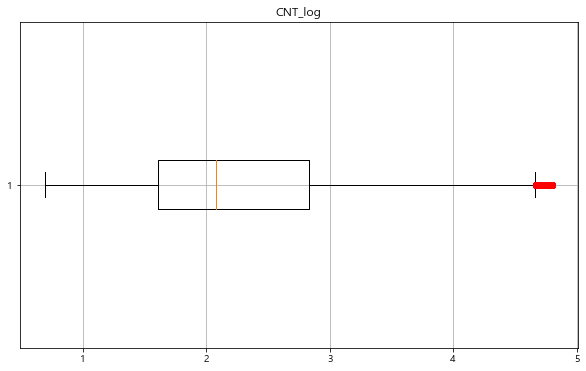

In [379]:
f, ax = plt.subplots(figsize = (10, 6)) 
plt.boxplot(jeju_data2['CNT_log'], sym = "ro", vert = 0)
plt.title('CNT_log')
plt.grid()

#### 변수 간 관계

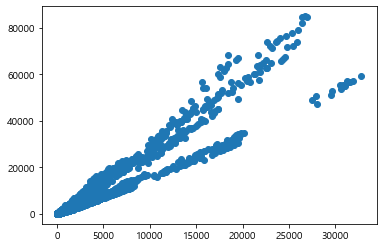

In [51]:
plt.scatter(jeju_data['CSTMR_CNT'], jeju_data['CNT']) # 이용고객수와 이용건수 (히트맵 상관관계 0.96)

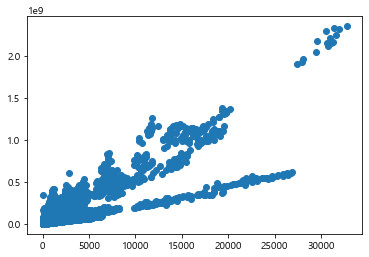

In [303]:
plt.scatter(jeju_data['CSTMR_CNT'], jeju_data['AMT']) # 이용고객수과 이용금액 (히트맵 상관관계 0.88)

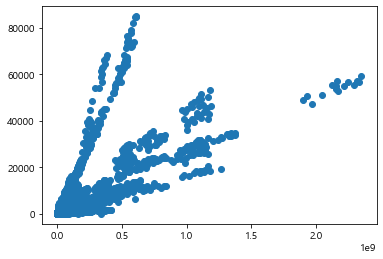

In [50]:
plt.scatter(jeju_data['AMT'], jeju_data['CNT']) # 이용금액과 이용건수 (히트맵 상관관계 0.79)